# Data Science Cities

## Content

- Introduction: Uncovering the data behind the cities
- Data Description: Where to start?
- Data Preparation
- Data Model: Machine Learning and K-Means Clustering
- Results
- Discussion
- Conclusion

## Introduction: Uncovering the data behind the cities

The most part of us come to a point when we need to make the next step, Data Science talking, in deciding to go for that Graduate diploma, and we pass several weeks, maybe months, trying to figure out which universities around the world to attend, knowing that we will live the next one or two years at least in that city. After narring down our options to four or five universities, we need to take into consideration, not only the cost of living, but the similarity between where we live and where we will be living for the next two years.

In this Data Science project I will try to board that problem: **Given the city where I live (Lima, Perú), which of these other four cities, where I have narrowed down my top university options, should I focus and invest the most of my effort to be part of.** For this, I will be considering three top Master of Science in Data Science programs:

- The University of Edinburgh
- University of Toronto
- ETH Zurich

These three universities have tuition fees per year around USD 30,000 (except for ETH Zurich which is around USD 3,000) for non-EU citizens. Although this, and Master's duration, may be important factors to consider, we will focus only in the city election by finding their similarities by their venues categories. 

*It is important to notice that these four cities have a similar average temperature across the year (from 0ºC to 19ºC) and an average precipitation of 80 mm (Zurich reaching 120 mm per year) so we will ignore those weather factors.*

---

## Data Description: Where to start?

We identify two main types of data sources:

1. Cities' boroughs and/or neighbourhoods
1. Venues categories around each city main neighbourhoods

#### For the first type we will be obtaining information from postal codes of each city.

### Edinburgh
The data needed is in a table in the following wikipedia site: https://en.wikipedia.org/wiki/EH_postcode_area
I will take only the central Edinburgh postal codes, which range from EH1 to EH17, having into consideration that The University of Edinburgh is in the EH8 postal code location.
Table columns are: Postcode district and post town.

### Toronto
The data needed is in a table in the following wikipedia site: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 

To filter the nearest boroughs and neighbourhoods I will map the boroughs using the Folium library and choose the four boroughs nearest to Scanborough, which is the location of the University of Toronto.
Table columns are: Postcode, Borough, and Neighbourhood

### Zurich
The data needed is in a table in the following site: http://www.geonames.org/postal-codes/CH/ZH/zurich.html
After some research I found that the central Zurich area, where ETH Zurich is located, have postal codes that start with 80 so will be focusing only on those ones.
Table columns are: Place, Code, Country, Admin1, Admin2, Admin3. *The last three columns represent the district and region*

### Lima
The data needed is in a .csv file with the postal codes from the districts that sorround the area where I live and mostly commute in the week.
Table columns are: Postal code, District, and Neighbourhood.

#### For the second type of data needed, I will be obtaining venues' categories from Foursquare

**Foursquare** is one of the biggest hubs for obtaining venues information from all over the world, not only limited to their category or location but users can review each venue and give each of them a punctuation.

I will use the Foursquare API to access each venue surrounding each postal code district or neighbourhood around 700 meters and with a limit of 100 venues per location. This data is then retrieved in a JSON format, where I will append it to each city districts and neighbourhoods dataframes.
I will be using the explore function from the venues category when calling the API. By this I can obtain the following data: venue name, vanue category and venue latitude and longitude.

Here is an example of the JSON dictionary that is retrieved:

```
{
  "meta": {
    "code": 200,
    "requestId": "59a45921351e3d43b07028b5"
  },
  "response": {
    "venue": {
      "id": "412d2800f964a520df0c1fe3",
      "name": "Central Park",
      "contact": {
        "phone": "2123106600",
        "formattedPhone": "(212) 310-6600",
        "twitter": "centralparknyc",
        "instagram": "centralparknyc",
        "facebook": "37965424481",
        "facebookUsername": "centralparknyc",
        "facebookName": "Central Park"
      },
      "location": {
        "address": "59th St to 110th St",
        "crossStreet": "5th Ave to Central Park West",
        "lat": 40.78408342593807,
        "lng": -73.96485328674316,
        "postalCode": "10028",
        "cc": "US",
        "city": "New York",
        "state": "NY",
        "country": "United States",
        "formattedAddress": [
          "59th St to 110th St (5th Ave to Central Park West)",
          "New York, NY 10028",
          "United States"
        ]
      },
      "canonicalUrl": "https://foursquare.com/v/central-park/412d2800f964a520df0c1fe3",
      "categories": [
        {
          "id": "4bf58dd8d48988d163941735",
          "name": "Park",
          "pluralName": "Parks",
          "shortName": "Park",
          "icon": {
            "prefix": "https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_",
            "suffix": ".png"
          },
          "primary": true
        }
```
I access the `response` item and then the `venue`item to retrieve data such as the venue name. I can enter inside that item the `location` item to retrieve the latitude and longitude. Finally by accessing the `categories` item I can retrieve the venue category.

***

*For the cost of living we will obtain this specific fact for each of the three cities from www.numbeo.com.*

***

## Data Preparation

I will start off loading the data into pandas dataframes and using the geocoder library to obtain the latitude and longitude for each district or neighbourhood.

In [1]:
#Install and import the BeautifulSoup, Geocoder and Matplotlib libraries

!conda install beautifulsoup4

from bs4 import BeautifulSoup
import requests

!pip install geocoder
import geocoder

from matplotlib import pyplot as plt

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    beautifulsoup4: 4.6.0-py35h442a8c9_1 --> 4.6.3-py35_0

beautifulsoup4 100% |################################| Time: 0:00:00  39.88 MB/s
    100% |████████████████████████████████| 102kB 7.1MB/s ta 0:00:01
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: click in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: future in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: chardet<3.1.0,>=

### Edinburgh dataframe

In [2]:
#After installing the BeautifulSoup library we install the URL library handler and pandas

import urllib.request as urllib2
import pandas as pd

#Loading the Edinburgh table using BeautifulSoup library


url ='https://en.wikipedia.org/wiki/EH_postcode_area'
with urllib2.urlopen(url) as html_file:
    soup = BeautifulSoup(html_file)
    
table = soup.find('table', class_='wikitable sortable')

edinburgh_df = pd.read_html(str(table), header = 0)[0]
edinburgh_df.head()

,Postcode district,Post town,Coverage,Local authority area
0,EH1,EDINBURGH,Mostly consists of Edinburgh's Old Town. Also ...,NaN
1,EH2,EDINBURGH,The New Town and central commercial area of Ed...,NaN
2,EH3,EDINBURGH,An odd shaped area surrounding EH1 and EH2 to ...,NaN
3,EH4,EDINBURGH,Radiates from the older and more central areas...,NaN
4,EH5,EDINBURGH,Based on a village formerly separate from the ...,NaN


In [3]:
edinburgh_df.rename(columns={'Postcode district':'Postal Code'}, inplace = True)
edinburgh_df.drop(['Coverage','Local authority area'], axis = 1, inplace = True)

#Inner Edinburgh should only include from EH1 to EH17
edinburgh_df.drop([17,18,19], axis=0, inplace=True)
print(edinburgh_df.shape)

#Standardize the Columns to merge all cities together
edinburgh_df['Neighbourhood'] = edinburgh_df['Post town']
edinburgh_df.rename(columns={'Post town':'Borough'}, inplace=True)
edinburgh_df['Country'] = 'UK'
edinburgh_df.head()

(17, 2)


,Postal Code,Borough,Neighbourhood,Country
0,EH1,EDINBURGH,EDINBURGH,UK
1,EH2,EDINBURGH,EDINBURGH,UK
2,EH3,EDINBURGH,EDINBURGH,UK
3,EH4,EDINBURGH,EDINBURGH,UK
4,EH5,EDINBURGH,EDINBURGH,UK


In [4]:
#We map the latitude and longitude using the geocoder library

latitude = []
longitude = []

for index, row in edinburgh_df.iterrows():
    while True:
        g = geocoder.arcgis('%s, Edinburgh, United Kingdom' % row['Postal Code'])
        latitude.append(g.lat)
        longitude.append(g.lng)
        if latitude[index] != None:
            break

edinburgh_df['Latitude'] = latitude
edinburgh_df['Longitude'] = longitude
edinburgh_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,EH1,EDINBURGH,EDINBURGH,UK,55.95309,-3.18899
1,EH2,EDINBURGH,EDINBURGH,UK,55.95340,-3.20064
2,EH3,EDINBURGH,EDINBURGH,UK,55.96030,-3.20309
3,EH4,EDINBURGH,EDINBURGH,UK,55.96183,-3.26510
4,EH5,EDINBURGH,EDINBURGH,UK,55.97482,-3.21536


In [5]:
#Check if all values are not NaN
edinburgh_df['Latitude'].isnull().any() & edinburgh_df['Longitude'].isnull().any()

False

### Toronto dataframe

In [6]:
#We move on loading the dataframe with the city of Toronto

url ='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
with urllib2.urlopen(url) as html_file:
    soup = BeautifulSoup(html_file)
    
table = soup.find('table', class_='wikitable sortable')

toronto_df = pd.read_html(str(table), header = 0)[0]
toronto_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [7]:
#Here we need to do a little data refinement. Not assigned Boroughs will be dropped and Not Assigned Neighbourhoods will be renamed to its borough

import numpy as np

toronto_df.rename(columns={'Postcode':'Postal Code'}, inplace=True)
toronto_df['Borough'].replace('Not assigned', np.nan, inplace=True)
toronto_df.dropna(subset=['Borough'],axis=0, inplace=True)
toronto_df['Neighbourhood'].replace('Not assigned', toronto_df['Borough'],inplace=True)
toronto_df.reset_index(drop=True,inplace=True)
toronto_df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [8]:
#Finally we group the Postal Codes and for repeating Neighbourhoods

toronto_df = toronto_df.groupby(['Postal Code','Borough'])[['Neighbourhood']].agg(lambda x: ', '.join(x))
toronto_df['Country'] = 'Canada'
toronto_df.reset_index(inplace=True)
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Country
0,M1B,Scarborough,"Rouge, Malvern",Canada
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",Canada
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",Canada
3,M1G,Scarborough,Woburn,Canada
4,M1H,Scarborough,Cedarbrae,Canada


In [9]:
#We map the latitude and longitude using the geocoder library

latitude = []
longitude = []

for index, row in toronto_df.iterrows():
    while True:
        g = geocoder.arcgis('%s, Toronto, Canada' % row['Postal Code'])
        latitude.append(g.lat)
        longitude.append(g.lng)
        if latitude[index] != None:
            break

toronto_df['Latitude'] = latitude
toronto_df['Longitude'] = longitude
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",Canada,43.811650,-79.195561
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",Canada,43.785605,-79.158701
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",Canada,43.765690,-79.175299
3,M1G,Scarborough,Woburn,Canada,43.768216,-79.217610
4,M1H,Scarborough,Cedarbrae,Canada,43.769608,-79.239440


In [10]:
#Check if any latitude has a NaN value

toronto_df['Latitude'].isnull().any() & toronto_df['Longitude'].isnull().any()

False

For Toronto we need to choose the four nearest boroughs visually aided with a map of it and tagging the boroughs and the University.

In [11]:
# Obtaining the mean location of each borough in Toronto

temp_toronto = toronto_df.groupby('Borough')['Latitude','Longitude'].mean()
temp_toronto.reset_index(inplace=True)
temp_toronto.head()

,Borough,Latitude,Longitude
0,Central Toronto,43.701806,-79.398985
1,Downtown Toronto,43.654154,-79.384989
2,East Toronto,43.667847,-79.337088
3,East York,43.699376,-79.333363
4,Etobicoke,43.660150,-79.539829


In [12]:
#We install and import the folium library and set the coordinates of the University of Toronto with a quick google search

!conda install folium -c conda-forge
import folium

u_lat=43.6629
u_lng=-79.3957

toronto_map = folium.Map(location=[u_lat,u_lng], zoom_start=11)

for lat, lng, label in zip(temp_toronto['Latitude'],temp_toronto['Longitude'],temp_toronto['Borough']):
    label = folium.Popup(label)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup=label,
    fill=True,
    color='blue',
    fill_opacity=0.7).add_to(toronto_map)
    
label = folium.Popup('University of Toronto')
folium.CircleMarker(
    [u_lat,u_lng],
    radius=5,
    popup=label,
    fill=True,
    color='Red',
    fill_opacity=0.7).add_to(toronto_map)

toronto_map

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.7.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00   2.95 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  15.10 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  26.70 MB/s
folium-0.7.0-p 100% |################################| Time: 0:00:00  38.16 MB/s


We see that the four most representative boroughs are the ones with 'Toronto' word in them. So we cut down our Toronto dataframe to list only those four boroughs.

In [13]:
toronto_df = toronto_df[toronto_df['Borough'].apply(lambda x: 'Toronto' in x)]
toronto_df.head(10)

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
37,M4E,East Toronto,The Beaches,Canada,43.676531,-79.295410
41,M4K,East Toronto,"The Danforth West, Riverdale",Canada,43.683262,-79.355120
42,M4L,East Toronto,"The Beaches West, India Bazaar",Canada,43.667985,-79.314642
43,M4M,East Toronto,Studio District,Canada,43.662766,-79.334830
44,M4N,Central Toronto,Lawrence Park,Canada,43.728135,-79.387090
45,M4P,Central Toronto,Davisville North,Canada,43.712755,-79.388514
46,M4R,Central Toronto,North Toronto West,Canada,43.714523,-79.406960
47,M4S,Central Toronto,Davisville,Canada,43.702765,-79.385769
48,M4T,Central Toronto,"Moore Park, Summerhill East",Canada,43.690505,-79.382973
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Canada,43.686003,-79.402335


In [14]:
toronto_df.reset_index(drop=True,inplace=True)
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,M4E,East Toronto,The Beaches,Canada,43.676531,-79.295410
1,M4K,East Toronto,"The Danforth West, Riverdale",Canada,43.683262,-79.355120
2,M4L,East Toronto,"The Beaches West, India Bazaar",Canada,43.667985,-79.314642
3,M4M,East Toronto,Studio District,Canada,43.662766,-79.334830
4,M4N,Central Toronto,Lawrence Park,Canada,43.728135,-79.387090


### Zurich dataframe

In [15]:
#Moving on to Zurich

url ='http://www.geonames.org/postal-codes/CH/ZH/zurich.html'
with urllib2.urlopen(url) as html_file:
    soup = BeautifulSoup(html_file)
    
table = soup.find('table', class_='restable')
zurich_df = pd.read_html(str(table), header = 0)[0]
zurich_df.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Zürich,8001.0,Switzerland,Kanton Zürich,Bezirk Zürich,Zürich
1,NaN,47.367/8.55,NaN,NaN,NaN,NaN,NaN
2,2.0,Zürich,8002.0,Switzerland,Kanton Zürich,Bezirk Zürich,Zürich
3,NaN,47.367/8.55,NaN,NaN,NaN,NaN,NaN
4,3.0,Zürich,8003.0,Switzerland,Kanton Zürich,Bezirk Zürich,Zürich


In [16]:
#We drop the Unnamed column and all the NaN rows.

zurich_df.drop(['Unnamed: 0','Place','Admin3'],axis=1,inplace=True)
zurich_df.dropna(axis=0,inplace=True)
zurich_df.rename(columns={'Code': 'Postal Code','Admin1':'Borough','Admin2':'Neighbourhood'},inplace=True)
zurich_df = zurich_df[['Postal Code','Borough','Neighbourhood','Country']]
zurich_df.reset_index(drop=True, inplace=True)
zurich_df.head()

,Postal Code,Borough,Neighbourhood,Country
0,8001.0,Kanton Zürich,Bezirk Zürich,Switzerland
1,8002.0,Kanton Zürich,Bezirk Zürich,Switzerland
2,8003.0,Kanton Zürich,Bezirk Zürich,Switzerland
3,8004.0,Kanton Zürich,Bezirk Zürich,Switzerland
4,8005.0,Kanton Zürich,Bezirk Zürich,Switzerland


In [17]:
#Keeping only the codes that start with '80'.

zurich_df = zurich_df[zurich_df['Postal Code']<8100]
zurich_df.reset_index(drop=True,inplace=True)
zurich_df.shape

(25, 4)

In [18]:
#We map the latitude and longitude using the geocoder library

latitude = []
longitude = []

for index, row in zurich_df.iterrows():
    while True:
        g = geocoder.arcgis('%s, Zurich, Switzerland' % row['Postal Code'])
        latitude.append(g.lat)
        longitude.append(g.lng)
        if latitude[index]!=None:
            break
    

zurich_df['Latitude'] = latitude
zurich_df['Longitude'] = longitude
zurich_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,8001.0,Kanton Zürich,Bezirk Zürich,Switzerland,47.374042,8.537470
1,8002.0,Kanton Zürich,Bezirk Zürich,Switzerland,47.360344,8.528245
2,8003.0,Kanton Zürich,Bezirk Zürich,Switzerland,47.370941,8.517275
3,8004.0,Kanton Zürich,Bezirk Zürich,Switzerland,47.378960,8.523050
4,8005.0,Kanton Zürich,Bezirk Zürich,Switzerland,47.386897,8.521336


In [19]:
zurich_df['Latitude'].isnull().any() & zurich_df['Longitude'].isnull().any()

False

### Lima dataframe

In [20]:
#Loading the last city from the .csv file
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_25df3c37ed4849389dcdd4dd39482a29 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vUtMtgJyZAbQqHichlUvxqzjTbEC11KNKSaO_X6l-8tp',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_25df3c37ed4849389dcdd4dd39482a29.get_object(Bucket='capstonedsprogramibm-donotdelete-pr-mzynazynqgddkr',Key='Lima Postal Codes -UTF8.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

lima_df = pd.read_csv(body)
lima_df.rename(columns={'District':'Borough'},inplace=True)
lima_df['Country'] = 'Peru'
lima_df.head()



,Postal Code,Borough,Neighbourhood,Country
0,15021,San Borja,"Ministerio de Cultura, Hospital del Ni–o San B...",Peru
1,15034,San Borja,Torres de San Borja,Peru
2,15036,San Borja,"Centro Comercial La Rambla, Ministerio de Ener...",Peru
3,15037,San Borja,"Av. San Luis, Cuartel General del Ejercito del...",Peru
4,15036,San Isidro,Corpac / Colegio San Agust’n,Peru


In [21]:
#We map the latitude and longitude using the geocoder library

latitude = []
longitude = []

for index, row in lima_df.iterrows():
    while True:
        g = geocoder.arcgis('%s, Lima, Peru' % row['Postal Code'])
        latitude.append(g.lat)
        longitude.append(g.lng)
        if latitude[index]!=None:
            break
    

lima_df['Latitude'] = latitude
lima_df['Longitude'] = longitude
lima_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,15021,San Borja,"Ministerio de Cultura, Hospital del Ni–o San B...",Peru,-12.078347,-76.997302
1,15034,San Borja,Torres de San Borja,Peru,-12.081195,-77.015965
2,15036,San Borja,"Centro Comercial La Rambla, Ministerio de Ener...",Peru,-12.100234,-77.011474
3,15037,San Borja,"Av. San Luis, Cuartel General del Ejercito del...",Peru,-12.098455,-76.990841
4,15036,San Isidro,Corpac / Colegio San Agust’n,Peru,-12.100234,-77.011474


### Master dataframe
We join the dataframes in a single one to model on it

In [22]:
#Joining the four dataframes in one

cities_df = edinburgh_df.append(toronto_df.append(zurich_df.append(lima_df)))
cities_df.reset_index(drop=True,inplace=True)
cities_df.shape

(98, 6)

In [23]:
cities_df.head()

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude
0,EH1,EDINBURGH,EDINBURGH,UK,55.95309,-3.18899
1,EH2,EDINBURGH,EDINBURGH,UK,55.95340,-3.20064
2,EH3,EDINBURGH,EDINBURGH,UK,55.96030,-3.20309
3,EH4,EDINBURGH,EDINBURGH,UK,55.96183,-3.26510
4,EH5,EDINBURGH,EDINBURGH,UK,55.97482,-3.21536


In [24]:
#We check the data types

cities_df.dtypes

Postal Code       object
Borough           object
Neighbourhood     object
Country           object
Latitude         float64
Longitude        float64
dtype: object

### Descriptive Statistics
We try to know better our data and look for statistics involving each city.

We start by showing how disperse in kilometers districts are in each city.

In [25]:
#We calculate the standard deviation to know how disperse are the districts in each city

by_city_df = cities_df.groupby('Country')['Latitude','Longitude'].std()
by_city_df.head()

,Latitude,Longitude
Country,,
Canada,0.024068,0.034928
Peru,0.021994,0.025255
Switzerland,0.023466,0.033210
UK,0.022765,0.051069


In [26]:
#Googling how many kilometers a latitude and longitude is, we can approximate it.

#lat-km = 110.574

by_city_df['Lat-Km'] = 110.574*by_city_df['Latitude']
by_city_df['Lng-Km'] = by_city_df['Latitude'].apply(lambda x: 111.320*np.cos(x))*by_city_df['Longitude']
by_city_df = by_city_df.round(2)
by_city_df.reset_index(inplace=True)
by_city_df

,Country,Latitude,Longitude,Lat-Km,Lng-Km
0,Canada,0.02,0.03,2.66,3.89
1,Peru,0.02,0.03,2.43,2.81
2,Switzerland,0.02,0.03,2.59,3.70
3,UK,0.02,0.05,2.52,5.68


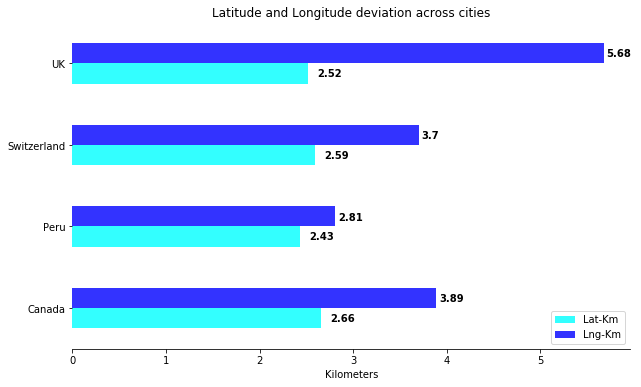

In [27]:
ax = by_city_df[['Country','Lat-Km','Lng-Km']].plot(kind='barh', figsize = (10,6), color=['cyan','blue'], alpha=0.8)
y = np.arange(len(by_city_df['Country']))

ax.set_title('Latitude and Longitude deviation across cities')
ax.set_xlabel('Kilometers')
for i, z in enumerate(by_city_df['Lat-Km']):    
    ax.text(z + 0.1, i-0.16, str(z), fontweight='bold')

for i, z in enumerate(by_city_df['Lng-Km']):
    ax.text(z + 0.03, i+0.08, str(z), fontweight='bold')
    
plt.yticks(y,by_city_df['Country'])
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

We can see that in average the cities are more dispersed in their longitude, that means in a South-North imaginary line. Also Edinburgh's got the highest dispersion meaning higher distances between districts. Latitude deviation doesn't vary much from each city.

Let's now graph the distribution for each city using a Kernel Density Estimate distribution graph from the seaborn library. Since we need a multivariate analysis graph to take into consideration both altitude and longitude, this graph will help us achieve our goal.

*A KDE (Kernel Density Estimate) is a distribution function that plots the probability density of a given variable. It sets for each data point a probability function (picture it as a 'bump') and adds up all the 'bumps' to form a distribution graph.*

Text(0.5,1,'Lima')

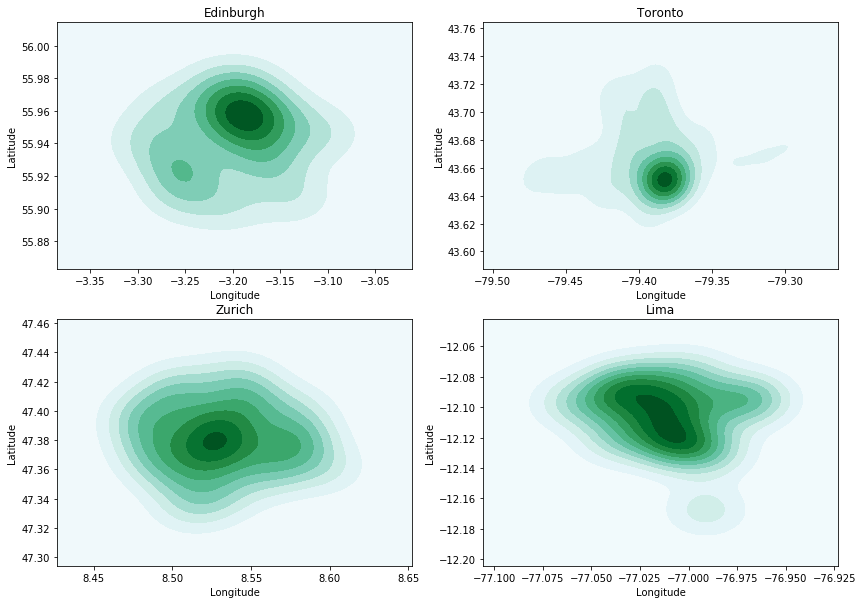

In [28]:
import seaborn as sns

#initialize canvas
fig = plt.figure(figsize=(14,10))

#set axes
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

#draw graphs
sns.kdeplot(edinburgh_df['Longitude'], edinburgh_df['Latitude'], shade=True,ax=ax0)
ax0.set_title('Edinburgh')

sns.kdeplot(toronto_df['Longitude'], toronto_df['Latitude'], shade=True,ax=ax1)
ax1.set_title('Toronto')

sns.kdeplot(zurich_df['Longitude'], zurich_df['Latitude'], shade=True,ax=ax2)
ax2.set_title('Zurich')

sns.kdeplot(lima_df['Longitude'], lima_df['Latitude'], shade=True,ax=ax3)
ax3.set_title('Lima')

We can easily see that the most normally distributed cities are Zurich and Toronto, this last one with a longer tail towards north, as in a less denser area. Lima, in the other hand, got a elonged top distribution and a low a tail towards south. Focusing on the top distribution, we can associate this with Zurich and Toronto.

Finally we show some descriptive statistics parameters for object type in cities_df dataframe using the `describe` method.

In [29]:
cities_df.describe(include=np.object)

,Postal Code,Borough,Neighbourhood,Country
count,98.0,98,98,98
unique,93.0,12,60,4
top,15023.0,Kanton Zürich,Bezirk Zürich,Canada
freq,2.0,25,24,38


### Gathering and ranking the venues

In this section we use the Foursquare API to gather the venues surrounding each district within 700 meters of each limited to 100 venues.

In [30]:
#Setting Foursquare credentials and version

CLIENT_ID = 'TN3QI1FNX0SSSESH0VI50FCPC3PPJWE0LV2BQRIEK25HGXYB'
CLIENT_SECRET = 'WMCOPGIROVIYJHSRB3NNL4M523FRSVF1W3CBKWEKG2N11GB2'
VERSION = '20180605'

In [31]:
#Define functions to get nearest venues
import json

def GetVenues(lat, lng, name, radius = 600, LIMIT=100):
    venues = []
    
    for lat, lng, name in zip(lat, lng, name):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues.append([(name, lat, lng, venue['venue']['categories'][0]['name'],
                        venue['venue']['name'],
                        venue['venue']['location']['lat'],
                        venue['venue']['location']['lng']) for venue in results])
        
    venues_list = pd.DataFrame(item for items in venues for item in items)
    venues_list.columns = ['Postal Code',
    'Postal Code Latitude',
    'Postal Code Longitude',
    'Venue Category',
    'Venue',
    'Venue Latitude',
    'Venue Longitude']
        
    return venues_list

In [32]:
#Getting the venues for each district

venues_list = GetVenues(cities_df['Latitude'],cities_df['Longitude'],cities_df['Postal Code'])

venues_list.head(10)

,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue Category,Venue,Venue Latitude,Venue Longitude
0,EH1,55.95309,-3.18899,Hotel,The Balmoral Hotel,55.953113,-3.189509
1,EH1,55.95309,-3.18899,Indian Restaurant,Dishoom,55.953726,-3.192540
2,EH1,55.95309,-3.18899,Pub,The Guildford Arms,55.953668,-3.190052
3,EH1,55.95309,-3.18899,Bar,The Voodoo Rooms,55.953622,-3.190504
4,EH1,55.95309,-3.18899,Electronics Store,Apple Princes Street,55.953446,-3.190218
5,EH1,55.95309,-3.18899,Monument / Landmark,The Scott Monument,55.952394,-3.193269
6,EH1,55.95309,-3.18899,Art Gallery,The Fruitmarket Gallery,55.951195,-3.189308
7,EH1,55.95309,-3.18899,Restaurant,Howies,55.954072,-3.185410
8,EH1,55.95309,-3.18899,Steakhouse,"Twenty Princes Street, Grill & Smokehouse",55.953061,-3.190703
9,EH1,55.95309,-3.18899,Hotel,Princes Street Suites,55.953370,-3.186934


In [33]:
venues_list.shape

(3988, 7)

In [34]:
#Setting one hot encoding

venues_one_hot = pd.get_dummies(venues_list[['Venue Category']], prefix ='', prefix_sep ='')
venues_one_hot['Postal Code'] = venues_list['Postal Code']
columns = np.concatenate((['Postal Code'], venues_one_hot.columns[:-1].values))
venues_one_hot = venues_one_hot[columns]

venues_summary = venues_one_hot.groupby('Postal Code').mean()
venues_summary.reset_index(inplace=True)
venues_summary.head(10)

,Postal Code,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Game Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,8001,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.02,...,0.0,0.010000,0.00,0.0,0.02,0.01,0.0,0.0,0.0,0.0
1,8002,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8003,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.016949,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,8004,0.01,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.010000,0.01,0.0,0.01,0.00,0.0,0.0,0.0,0.0
4,8005,0.01,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
5,8006,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
6,8008,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
7,8032,0.00,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
8,8037,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
9,8038,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0


After the one hot encoding, we create another dataframe with the top 10 venues for each Postal Code

In [35]:
#Defining function to generate columns names

def name_ranks(n):
    columns = []
    ranks = ['st','nd','rd']
    
    for i in range(n):
        try:
            columns.append('{}{} Most Common Venue'.format(i+1,ranks[i]))
        except:
            columns.append('{}th Most Common Venue'.format(i+1))
            
    return columns

#Define function to get top n venues

def top_venues(df, top_n=10):
    
    top = []
    for i in range(df.shape[0]):
        row = df.iloc[i,1:]
        row.sort_values(ascending=False, inplace=True)
        row = row[:top_n]
        top.append(np.array(row.index))
        
    top_df = pd.DataFrame(item for item in top)
    top_df['Postal Code'] = df['Postal Code']
    columns = np.concatenate((['Postal Code'],top_df.columns[:-1].values))
    top_df = top_df[columns]
    top_df.columns = np.concatenate((['Postal Code'],name_ranks(top_n)))
    
    return top_df    

In [36]:
ranking_cities = top_venues(venues_summary)
ranking_cities.head(10)

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,8001,Bar,Restaurant,Swiss Restaurant,Vegetarian / Vegan Restaurant,Lounge,Italian Restaurant,Cocktail Bar,Department Store,Hotel,Plaza
1,8002,Tram Station,Italian Restaurant,Hotel,Bakery,Restaurant,Park,Swiss Restaurant,Supermarket,Plaza,Bar
2,8003,Italian Restaurant,Bar,Café,Thai Restaurant,Pizza Place,Swiss Restaurant,Japanese Restaurant,French Restaurant,Asian Restaurant,Tapas Restaurant
3,8004,Bar,Italian Restaurant,Swiss Restaurant,Restaurant,Thai Restaurant,Nightclub,Chinese Restaurant,Middle Eastern Restaurant,Café,Vegetarian / Vegan Restaurant
4,8005,Nightclub,Bar,Café,Italian Restaurant,Restaurant,Plaza,Thai Restaurant,Swiss Restaurant,Bakery,Hotel
5,8006,Italian Restaurant,Hotel,Tram Station,Swiss Restaurant,Restaurant,Park,Bakery,Supermarket,Indian Restaurant,Motorcycle Shop
6,8008,Swiss Restaurant,Bakery,Museum,Italian Restaurant,Restaurant,Tram Station,Mexican Restaurant,Performing Arts Venue,Beach,Taverna
7,8032,Light Rail Station,Hotel,Tram Station,Swiss Restaurant,Italian Restaurant,Bakery,Park,Convenience Store,Supermarket,Plaza
8,8037,Grocery Store,Bakery,Gym Pool,Athletics & Sports,Tram Station,Swiss Restaurant,Café,Park,Design Studio,Italian Restaurant
9,8038,Tram Station,Bus Station,Supermarket,Pool,Music Venue,Café,Swiss Restaurant,Gas Station,Bar,Salon / Barbershop


## Data Model: Machine Learning and K-Means Clustering

After we got the one hot enconding ready to be processed by machine learning algorithms and the top 10 venues, we are ready to model the data.
We will use the 'elbow' method to determine the optimum value of K.

We chose to use KMeans Clustering Machine Learning algorith because of the simplicity of its parameters decision and the 'elbow' method available to easily distinguish the appropriate K value. Basically the venues distribution would have a more hyperspherical shape, because we base our data in the proportion of a determine venue category more dense assuming a normal distribution, denser at the center.

In [37]:
#Import KMeans library
from sklearn.cluster import KMeans

#Set for loop to gather different inertia values
error = []
cluster_model = venues_summary.drop('Postal Code',axis=1)

for i in range(2,11):
    n_clusters = i    

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(cluster_model)
    error.append(kmeans.inertia_)

Text(5.1,5.8,'Elbow: K = 6')

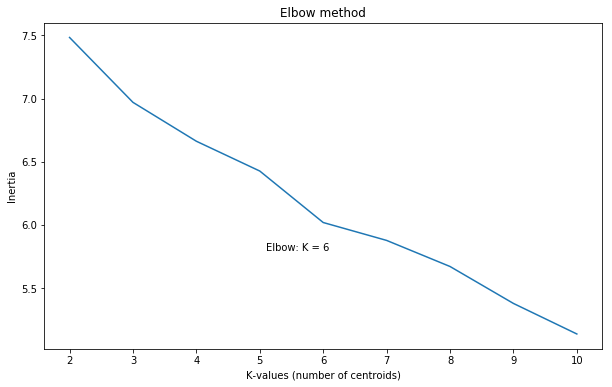

In [38]:
#Plotting inertia points to find any elbow point
x = np.arange(2,11)
plt.figure(figsize=(10,6))
plt.plot(x,error)
plt.title('Elbow method')
plt.xlabel('K-values (number of centroids)')
plt.ylabel('Inertia')

plt.annotate(s = 'Elbow: K = 6', xy=(5.1,5.8))

We find here a very diffuse, but nevertheless present, elbow point. One reason may be the high number of dimensions which makes difficult any try to find clearly defined hyperspheric clusters.

In [39]:
#We choose the k = 6 clusters to run our KMeans algorithm

n_clusters = 6    

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [40]:
#Merging labels with top 10 most common venues

ranking_cities['Cluster label'] = kmeans.labels_
columns = np.concatenate((['Cluster label'],ranking_cities.columns[:-1]))
ranking_cities = ranking_cities[columns]
ranking_cities.head(10)

,Cluster label,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,8001,Bar,Restaurant,Swiss Restaurant,Vegetarian / Vegan Restaurant,Lounge,Italian Restaurant,Cocktail Bar,Department Store,Hotel,Plaza
1,3,8002,Tram Station,Italian Restaurant,Hotel,Bakery,Restaurant,Park,Swiss Restaurant,Supermarket,Plaza,Bar
2,3,8003,Italian Restaurant,Bar,Café,Thai Restaurant,Pizza Place,Swiss Restaurant,Japanese Restaurant,French Restaurant,Asian Restaurant,Tapas Restaurant
3,3,8004,Bar,Italian Restaurant,Swiss Restaurant,Restaurant,Thai Restaurant,Nightclub,Chinese Restaurant,Middle Eastern Restaurant,Café,Vegetarian / Vegan Restaurant
4,3,8005,Nightclub,Bar,Café,Italian Restaurant,Restaurant,Plaza,Thai Restaurant,Swiss Restaurant,Bakery,Hotel
5,0,8006,Italian Restaurant,Hotel,Tram Station,Swiss Restaurant,Restaurant,Park,Bakery,Supermarket,Indian Restaurant,Motorcycle Shop
6,0,8008,Swiss Restaurant,Bakery,Museum,Italian Restaurant,Restaurant,Tram Station,Mexican Restaurant,Performing Arts Venue,Beach,Taverna
7,0,8032,Light Rail Station,Hotel,Tram Station,Swiss Restaurant,Italian Restaurant,Bakery,Park,Convenience Store,Supermarket,Plaza
8,0,8037,Grocery Store,Bakery,Gym Pool,Athletics & Sports,Tram Station,Swiss Restaurant,Café,Park,Design Studio,Italian Restaurant
9,0,8038,Tram Station,Bus Station,Supermarket,Pool,Music Venue,Café,Swiss Restaurant,Gas Station,Bar,Salon / Barbershop


In [55]:
#Merging dataframe with initial cities dataframe

complete_df = cities_df.join(ranking_cities.set_index('Postal Code'), on='Postal Code')
complete_df.reset_index(drop=True,inplace=True)
complete_df.head(10)

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EH1,EDINBURGH,EDINBURGH,UK,55.95309,-3.18899,3,Hotel,Café,Bar,Coffee Shop,Restaurant,Pub,Art Gallery,Indian Restaurant,Mexican Restaurant,Italian Restaurant
1,EH2,EDINBURGH,EDINBURGH,UK,55.95340,-3.20064,3,Bar,Coffee Shop,Italian Restaurant,Café,Art Gallery,Thai Restaurant,Cocktail Bar,French Restaurant,Hotel,Pub
2,EH3,EDINBURGH,EDINBURGH,UK,55.96030,-3.20309,3,Café,Pub,Coffee Shop,Bar,Hotel,Restaurant,Park,Italian Restaurant,Gym / Fitness Center,Pizza Place
3,EH4,EDINBURGH,EDINBURGH,UK,55.96183,-3.26510,3,Convenience Store,Fish & Chips Shop,Café,Pub,Hostel,Exhibit,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant
4,EH5,EDINBURGH,EDINBURGH,UK,55.97482,-3.21536,0,Indian Restaurant,Rental Car Location,Grocery Store,Rugby Pitch,Harbor / Marina,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant
5,EH6,EDINBURGH,EDINBURGH,UK,55.97465,-3.18367,3,Hotel,Grocery Store,Park,Trail,Hobby Shop,Gym / Fitness Center,Food Court,Fish & Chips Shop,Chinese Restaurant,Café
6,EH7,EDINBURGH,EDINBURGH,UK,55.95768,-3.17531,3,Hotel,Italian Restaurant,Café,Bar,Pub,Bakery,Grocery Store,Gay Bar,French Restaurant,Park
7,EH8,EDINBURGH,EDINBURGH,UK,55.95505,-3.14857,5,Bar,Supermarket,Café,Zoo,Falafel Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
8,EH9,EDINBURGH,EDINBURGH,UK,55.93524,-3.17574,3,Pub,Hotel,Bar,Restaurant,Indian Restaurant,Pool,Hostel,Argentinian Restaurant,Farmers Market,Pizza Place
9,EH10,EDINBURGH,EDINBURGH,UK,55.90231,-3.20502,0,Convenience Store,Mediterranean Restaurant,Outdoor Supply Store,Pizza Place,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### Categorize each Cluster

We now search for the districts in each cluster to apply a category.

In [46]:
#Cluster 1
complete_df[complete_df['Cluster label']==0]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,EH5,EDINBURGH,EDINBURGH,UK,55.974820,-3.215360,0,Indian Restaurant,Rental Car Location,Grocery Store,Rugby Pitch,Harbor / Marina,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant
9,EH10,EDINBURGH,EDINBURGH,UK,55.902310,-3.205020,0,Convenience Store,Mediterranean Restaurant,Outdoor Supply Store,Pizza Place,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
12,EH13,EDINBURGH,EDINBURGH,UK,55.908160,-3.253200,0,Beer Garden,Convenience Store,Italian Restaurant,Trail,Zoo,Elementary School,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
13,EH14,"BALERNO, CURRIE, EDINBURGH, JUNIPER GREEN","BALERNO, CURRIE, EDINBURGH, JUNIPER GREEN",UK,55.922330,-3.250420,0,Supermarket,Bowling Alley,Gym,Fast Food Restaurant,Music Venue,Pizza Place,Market,Tourist Information Center,Chinese Restaurant,Trail
16,EH17,EDINBURGH,EDINBURGH,UK,55.906800,-3.134350,0,Supermarket,Cave,Fast Food Restaurant,Grocery Store,Pharmacy,Park,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant
60,8006,Kanton Zürich,Bezirk Zürich,Switzerland,47.384800,8.543950,0,Italian Restaurant,Hotel,Tram Station,Swiss Restaurant,Restaurant,Park,Bakery,Supermarket,Indian Restaurant,Motorcycle Shop
61,8008,Kanton Zürich,Bezirk Zürich,Switzerland,47.355947,8.562409,0,Swiss Restaurant,Bakery,Museum,Italian Restaurant,Restaurant,Tram Station,Mexican Restaurant,Performing Arts Venue,Beach,Taverna
62,8032,Kanton Zürich,Bezirk Zürich,Switzerland,47.366918,8.567839,0,Light Rail Station,Hotel,Tram Station,Swiss Restaurant,Italian Restaurant,Bakery,Park,Convenience Store,Supermarket,Plaza
63,8037,Kanton Zürich,Bezirk Zürich,Switzerland,47.397563,8.523776,0,Grocery Store,Bakery,Gym Pool,Athletics & Sports,Tram Station,Swiss Restaurant,Café,Park,Design Studio,Italian Restaurant
64,8038,Kanton Zürich,Bezirk Zürich,Switzerland,47.340946,8.531596,0,Tram Station,Bus Station,Supermarket,Pool,Music Venue,Café,Swiss Restaurant,Gas Station,Bar,Salon / Barbershop


In [47]:
#Cluster 2
complete_df[complete_df['Cluster label']==1]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,M5N,Central Toronto,Roselawn,Canada,43.711941,-79.41912,1,Garden,Pet Store,Home Service,Falafel Restaurant,Elementary School,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit


In [48]:
#Cluster 3
complete_df[complete_df['Cluster label']==2]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,EH11,EDINBURGH,EDINBURGH,UK,55.92965,-3.26037,2,Grocery Store,River,Gym / Fitness Center,Auto Workshop,Zoo,Exhibit,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant


In [49]:
#Cluster 4
complete_df[complete_df['Cluster label']==3]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EH1,EDINBURGH,EDINBURGH,UK,55.953090,-3.188990,3,Hotel,Café,Bar,Coffee Shop,Restaurant,Pub,Art Gallery,Indian Restaurant,Mexican Restaurant,Italian Restaurant
1,EH2,EDINBURGH,EDINBURGH,UK,55.953400,-3.200640,3,Bar,Coffee Shop,Italian Restaurant,Café,Art Gallery,Thai Restaurant,Cocktail Bar,French Restaurant,Hotel,Pub
2,EH3,EDINBURGH,EDINBURGH,UK,55.960300,-3.203090,3,Café,Pub,Coffee Shop,Bar,Hotel,Restaurant,Park,Italian Restaurant,Gym / Fitness Center,Pizza Place
3,EH4,EDINBURGH,EDINBURGH,UK,55.961830,-3.265100,3,Convenience Store,Fish & Chips Shop,Café,Pub,Hostel,Exhibit,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant
5,EH6,EDINBURGH,EDINBURGH,UK,55.974650,-3.183670,3,Hotel,Grocery Store,Park,Trail,Hobby Shop,Gym / Fitness Center,Food Court,Fish & Chips Shop,Chinese Restaurant,Café
6,EH7,EDINBURGH,EDINBURGH,UK,55.957680,-3.175310,3,Hotel,Italian Restaurant,Café,Bar,Pub,Bakery,Grocery Store,Gay Bar,French Restaurant,Park
8,EH9,EDINBURGH,EDINBURGH,UK,55.935240,-3.175740,3,Pub,Hotel,Bar,Restaurant,Indian Restaurant,Pool,Hostel,Argentinian Restaurant,Farmers Market,Pizza Place
11,EH12,EDINBURGH,EDINBURGH,UK,55.942410,-3.293160,3,Fish & Chips Shop,Bus Stop,English Restaurant,Sporting Goods Shop,Fast Food Restaurant,Supermarket,Italian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant
14,EH15,EDINBURGH,EDINBURGH,UK,55.945780,-3.103590,3,Pub,Athletics & Sports,Hotel,Bathing Area,Beach,Bus Stop,Furniture / Home Store,Train Station,Diner,English Restaurant
15,EH16,EDINBURGH,EDINBURGH,UK,55.928120,-3.158740,3,Hotel,Fast Food Restaurant,Park,Pharmacy,Bookstore,Supermarket,Chocolate Shop,Athletics & Sports,Clothing Store,Coffee Shop


In [50]:
#Cluster 5
complete_df[complete_df['Cluster label']==4]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,M4N,Central Toronto,Lawrence Park,Canada,43.728135,-79.387090,4,Park,Swim School,Bus Line,Dim Sum Restaurant,Falafel Restaurant,Elementary School,English Restaurant,Ethiopian Restaurant,Event Service,Event Space
25,M4T,Central Toronto,"Moore Park, Summerhill East",Canada,43.690505,-79.382973,4,Gym,Trail,Playground,Park,Zoo,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant
27,M4W,Downtown Toronto,Rosedale,Canada,43.681960,-79.378445,4,Park,Grocery Store,Candy Store,Playground,Bank,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant
36,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",Canada,43.623470,-79.393979,4,Harbor / Marina,Park,Music Venue,Athletics & Sports,Zoo,Exhibit,Elementary School,English Restaurant,Ethiopian Restaurant,Event Service
40,M5P,Central Toronto,"Forest Hill North, Forest Hill West",Canada,43.694785,-79.414405,4,Playground,Home Service,Park,Fish Market,Fish & Chips Shop,Eastern European Restaurant,Electronics Store,Elementary School,English Restaurant,Ethiopian Restaurant
82,15036,San Borja,"Centro Comercial La Rambla, Ministerio de Ener...",Peru,-12.100234,-77.011474,4,Park,Peruvian Restaurant,Coffee Shop,Cosmetics Shop,Bar,Ice Cream Shop,Yoga Studio,Italian Restaurant,Juice Bar,Korean Restaurant
84,15036,San Isidro,Corpac / Colegio San Agust’n,Peru,-12.100234,-77.011474,4,Park,Peruvian Restaurant,Coffee Shop,Cosmetics Shop,Bar,Ice Cream Shop,Yoga Studio,Italian Restaurant,Juice Bar,Korean Restaurant


In [51]:
#Cluster 6
complete_df[complete_df['Cluster label']==5]

,Postal Code,Borough,Neighbourhood,Country,Latitude,Longitude,Cluster label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,EH8,EDINBURGH,EDINBURGH,UK,55.95505,-3.14857,5,Bar,Supermarket,Café,Zoo,Falafel Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop


#### Constructing categories for each cluster

These are the 6 clusters categories:

1. **Cluster 1**: Restaurants (Indian, Swiss and Italian) & Services | *Only Zurich and Edinburgh*
1. **Cluster 2**: Schools and Gardens | *Only Toronto*
1. **Cluster 3**: Fitness Center, Zoo, Convenience Store | *Only Edinburgh - mostly low urban area*
1. **Cluster 4**: Coffee Shop, Nightlife and Fast Food | *All cities*
1. **Cluster 5**: Stores, shops, studios | *Toronto and Lima*
1. **Cluster 6**: Bar, cafés and zoo | *Only Edinburgh*

As we see we should only focus in Clusters 4 and 5, since those two are the only ones which include Lima, our original city. We need to consider that the cities exposed here vary a lot in cultural, political and socioeconomical realities, basically Lima remains a developing city compared against Zurich, Edinburgh and Toronto, fully developed cities, so it was expected to not find an evident and direct relation between venues from those cities.

In [61]:
#Getting new dataframe with just clusters 4 and 5

clusters45 = complete_df[(complete_df['Cluster label']==3) | (complete_df['Cluster label']==4)]
clusters45.shape

(71, 17)

## Mapping the results

We start by mapping the 4 cities with the clusters 4 and 5.

### Toronto

In [64]:
import matplotlib.cm as cm
import matplotlib.colors as colors

toronto_clusters = clusters45[clusters45['Country']=='Canada']

toronto_map = folium.Map(location=[43.6532,-79.3932], zoom_start=11)

colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for name, lat, lon, cluster in zip(toronto_clusters['Neighbourhood'], toronto_clusters['Latitude'], toronto_clusters['Longitude'], toronto_clusters['Cluster label']):
    label = folium.Popup(str(name) + ' | Cluster: ' + str(cluster+1))
    folium.CircleMarker([lat,lon], radius=5, popup=label, color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(toronto_map)
    
toronto_map

### Edinburgh

In [65]:
edinburgh_clusters = clusters45[clusters45['Country']=='UK']

edinburgh_map = folium.Map(location=[55.9533,-3.1883], zoom_start=11)

colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for name, lat, lon, cluster in zip(edinburgh_clusters['Neighbourhood'], edinburgh_clusters['Latitude'], edinburgh_clusters['Longitude'], edinburgh_clusters['Cluster label']):
    label = folium.Popup(str(name) + ' | Cluster: ' + str(cluster+1))
    folium.CircleMarker([lat,lon], radius=5, popup=label, color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(edinburgh_map)
    
edinburgh_map

### Zurich

In [67]:
swiss_clusters = clusters45[clusters45['Country']=='Switzerland']

swiss_map = folium.Map(location=[47.3769,8.5417], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for name, lat, lon, cluster in zip(swiss_clusters['Neighbourhood'], swiss_clusters['Latitude'], swiss_clusters['Longitude'], swiss_clusters['Cluster label']):
    label = folium.Popup(str(name) + ' | Cluster: ' + str(cluster+1))
    folium.CircleMarker([lat,lon], radius=5, popup=label, color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(swiss_map)
    
swiss_map

### Lima

In [68]:
peru_clusters = clusters45[clusters45['Country']=='Peru']

peru_map = folium.Map(location=[-12.0464,-77.0428], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for name, lat, lon, cluster in zip(peru_clusters['Neighbourhood'], peru_clusters['Latitude'], peru_clusters['Longitude'], peru_clusters['Cluster label']):
    label = folium.Popup(str(name) + ' | Cluster: ' + str(cluster+1))
    folium.CircleMarker([lat,lon], radius=5, popup=label, color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(peru_map)
    
peru_map

## Cost of Living

We now analyze, as an extra data to aid us in our election, the cost of living amongst these four cities. Evidently the cheapest, the better.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


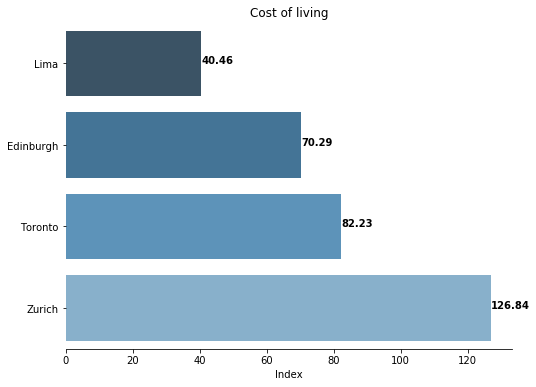

In [89]:
#Data from numbeo.com. It show a cost of living index.

toronto_cost = 82.23
edinburgh_cost = 70.29
zurich_cost = 126.84
lima_cost = 40.46

#Graphing

x = np.sort([toronto_cost,edinburgh_cost,zurich_cost,lima_cost])
y = ['Lima','Edinburgh','Toronto','Zurich']

fig = plt.figure(figsize=(8,6))

ax = sns.barplot(x=x,y=y, palette='Blues_d')

plt.title('Cost of living')
plt.xlabel('Index')

for i in range(len(x)):
    plt.text(x =x[i],y=i,s=x[i],fontweight='bold')
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

We encounter with the following result: Zurich is by far more expensive than any other city, so it can be ruled out. Edinburgh and Toronto are much closer to each other, so we can lower our options to these two.

## Results

Our statistical analysis showed that, geographically, the most similar cities to Lima are Toronto and Zurich. This can be seen in the KDE graphs in shades of green at the start of this report. Lima, although showing a more horizontal distribution, it shows a dense area at the center, different than Edinburgh which has two dense areas, whereas Toronto and Zurich conserve a single denser area.

Moving on, our decision to develop a 6 clusters KMeans model (as shown by the 'elbow' method) turned up to have interesting results. First of all, only clusters 4 and 5 where present in Lima, so we narrowed down our analysis to only these two clusters. Additionally first two clusters show that Italian and Indian restaurants are rather common in both Zurich and Edinburgh and the fifth cluster show how common grean areas are in Toronto and uncommon in Zurich and Edinburgh. Remaining clusters show a more specific type of clusters, common in zoos and stations. We notice that Edinburgh shares a rural area along with its not metropolitan-center.

**When mapping all four cities, we identify that Lima and Toronto are the only cities which share both cluster 4 and 5 and in a similar proportion. This will be decisive in our conclusion.**

Finally the Cost of Living graph shows the great difference that exists in Zurich versus the remaining cities. Edinburgh and Toronto show a similar index.

## Discussion

The most important observation discovered is the similarity between Lima and Toronto, sharing the same continent, and the difference between Edinburgh and Zurich, both in Europe, with not only a different distribution, but also having venues that Lima barely had noticed even more with the fact that no other cluster had in common Lima and any other city than clusters 4 and 5.

As a recommendation, is important to try to determine the sample extension in each city, how many boroughs, postal codes, or districts to span in. In this case Toronto had a much bigger number of districts, although a similar area covered. This could result in a possible skewness behaviour towards Toronto venues.
Also, is important to determine the correct neighbourhood radius when making the calls to Foursquare API. A radius too large and different districts scope may overlap, resulting in doubled data. A radius too small and the sample may be too short or not significant.

## Conclusion

Gathering the results discussed, we conclude that **Toronto** is the city to go to study a MSc in Data Science for me and anybody living in Lima! Evidently this decision should be weighted with the University which you want to go, and the cost of it.
This result became evident when mapping the clusters 4 and 5 and more easy to take when analyzing the cost of living data.